<center><font size="5"><b> PYSPRINT 0.12.1 </b></font> </center>

### Ablakolt Fourier-transzformációs módszer, WFTMethod

####  A `WFTMethod` specifikus függvények:

* `add_window(center, std=None, fwhm=None, order=2)`
  * Egy Gauss ablakfüggvény "hozzáadása" az interferogramhoz.
  * `center` : Az ablak központi helye.
  * `fwhm` vagy `std` : Az ablak félértékszélessége vagy szórása. Csak az egyik adható meg.
  * `order` : A Gauss ablakfüggvény kitevője.
 ---
* `add_window_arange(start, stop, step, std=None, fwhm=None, order=2)`
  * Egy Gauss ablakfüggvény sorozat "hozzáadása" az interferogramhoz, amelyeknek a központi helyei a `np.arange(start, stop, step)` függvényből vannak megállapítva. Az összes többi argumentum azonos az `add_window` függvényével.
  
 ---
 
* `add_window_linspace(start, stop, num, std=None, fwhm=None, order=2)`
  * Egy Gauss ablakfüggvény sorozat "hozzáadása" az interferogramhoz, amelyeknek a központi helyei a `np.linspace(start, stop, num)` függvényből vannak megállapítva. Az összes többi argumentum azonos az `add_window` függvényével.
 
---

* `add_window_geomspace(start, stop, num, std=None, fwhm=None, order=2)`
  * Egy Gauss ablakfüggvény sorozat "hozzáadása" az interferogramhoz, amelyeknek a központi helyei a `np.geomspace(start, stop, num)` függvényből vannak megállapítva. Az összes többi argumentum azonos az `add_window` függvényével.
  
  ---
  
* `view_windows(ax=None, maxsize=80, **kwargs)`
  * Az interferogram és a hozzáadott ablakfüggvények megtekintése. Ha az ablakfüggvények száma meghaladja a `maxsize` arugmentumot, akkor csak egy mintát plottol. (Általában nem túl jó ötlet 80-nál több görbét rajzolni egyetlen matplotlib figure-ra.)
  * `**kwargs` : További argumentumok amit a `plt.plot` kap meg.
  ---
* `remove_all_windows`
  * Eltávolítja az összes hozzáadott ablakfüggvényt.
  ---
* `reset_state`
  * Minden visszaállítása alapállapotba, csak a betöltött interferogram megtartása.
 ---
* `remove_window_at(center)`
  * A `center`-rel adott központi helyen lévő ablakfüggvény eltávolítása.
  ---
* `remove_window_interval(start, stop)`
  * A `start` és `stop` között lévő központi helyű összes ablakfüggvény eltávolítása.
---
* `retrieve_GD(silent=False, fastmath=True, usenifft=False)`
  * A GD függvény megtalálása. Egy `ps.core.phase.Phase` objektumot ad vissza, ami `GD_mode=True` módon van inicializálva, amit a diszperizós együtthatók meghatározásánál figyelembe fog venni a program. (Analóg az FFTMethod `retrieve_phase` függvényével.)
  * `silent` : Ha `True`, akkor a konzolon mutatni fogja a státuszt
  * `fastmath` : Ha `True`, akkor a contourplothoz nem építi fel az szükséges tömböket, így gyorsabb a számolás.
  * `usenifft` : A Non-uniform FFT algoritmus használata (itt még nem stabil).
  ---
* <code>
    calculate(
            reference_point,
            order,
            show_graph=False,
            silent=False,
            force_recalculate=False,
            fastmath=True,
            usenifft=False
    )
</code>

  *  Kiszámolja a GD függvényt, majd abból illesztéssel a diszperziós együtthatókat. A kódban a `retrieve_GD` függvényt hívja meg, és görbét is illeszt.
  *  `force_recalculate` : A köztes eredmények gyorsítótárazva vannak, tehát ha egyszer már elvégeztük a GD függvény kiszámítását, akkor azt a program megjegyzi, így csak az illesztést számolja újra. Ha ez az argumentum `True`, akkor kényszeríti a programot, hogy minden hívásnál újra számolja a GD görbét.
  * Az összes többi argumentum az előzőkben már szerepelt.
  ---
  
* `heatmap(ax=None, levels=None, cmap="viridis", include_ridge=True)`
  * A contourplot kirajzolása. Csak a `fastmath=False` számítás esetén működik.
Ezt az eljárást csak szimulált interferogramon tudom bemutatni.
---

Példaként generálok egy interferogramot:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pysprint as ps

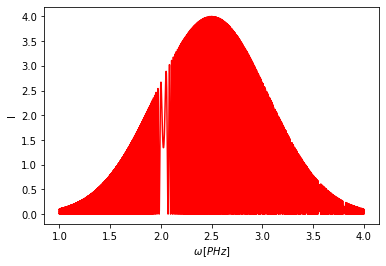

In [2]:
g = ps.Generator(1, 4, 2.5, delay=900, GDD=400, FOD=40000, pulse_width=3, resolution=0.05)
g.generate()

mywft = ps.WFTMethod(*g.data)
mywft.plot()

In [3]:
mywft.add_window_linspace(2.2, 3.1, 200, fwhm=0.04, order=2)

**FONTOS!** 

Ha a fenti `add_window_linspace` lefutott, akkor az ablakfüggvény sorozat már hozzáadódott az interferogramhoz. Ha később megváltoztatnánk bármelyik paraméterét (pl. inkább más `fwhm`-ot szeretnénk beállítani), akkor az előző ablakfüggvények is megmaradak. Emiatt ajánlott a fenti cellát a következőképpen használni:

In [4]:
# az összes hozzáadott ablakfüggvény eltávolítása függetlenül attól, hogy korábban voltak-e
mywft.remove_all_windows()

# ezután adom hozzá az ablakfüggvény sorozatot
mywft.add_window_linspace(2.2, 3.1, 200, fwhm=0.05, order=2)

Az aktuálisan hozzáadott ablakfüggvényeket a `WFTMethod.windows` paraméterrel érjük el, ami egy `dictionary`-t ad vissza, amelyben a *key* az ablakfüggvény központi helye, a hozzá tartozó *value* pedig maga az ablakfüggvény reprezentációja (`ps.core.method.wft.Window`).

In [5]:
mywft.windows

{2.2: Window(center=2.20000, fwhm=0.05, order=2),
 2.204522613065327: Window(center=2.20452, fwhm=0.05, order=2),
 2.2090452261306535: Window(center=2.20905, fwhm=0.05, order=2),
 2.21356783919598: Window(center=2.21357, fwhm=0.05, order=2),
 2.2180904522613067: Window(center=2.21809, fwhm=0.05, order=2),
 2.2226130653266334: Window(center=2.22261, fwhm=0.05, order=2),
 2.22713567839196: Window(center=2.22714, fwhm=0.05, order=2),
 2.2316582914572867: Window(center=2.23166, fwhm=0.05, order=2),
 2.2361809045226133: Window(center=2.23618, fwhm=0.05, order=2),
 2.24070351758794: Window(center=2.24070, fwhm=0.05, order=2),
 2.2452261306532666: Window(center=2.24523, fwhm=0.05, order=2),
 2.2497487437185932: Window(center=2.24975, fwhm=0.05, order=2),
 2.25427135678392: Window(center=2.25427, fwhm=0.05, order=2),
 2.2587939698492465: Window(center=2.25879, fwhm=0.05, order=2),
 2.263316582914573: Window(center=2.26332, fwhm=0.05, order=2),
 2.2678391959799: Window(center=2.26784, fwhm=0.05

In [6]:
mywft.calculate(reference_point=2.5, order=4, fastmath=False);

Progress : [==============================] 100%

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

A fenti `calculate` függvény ha már egyszer lefutott és megpróbáljuk újra lefuttatni más referencia ponttal vagy más illesztési renddel, akkor a gyorsítótárazás miatt azok már azonnal végrehajtódnak (csak az illesztést számolja újra).

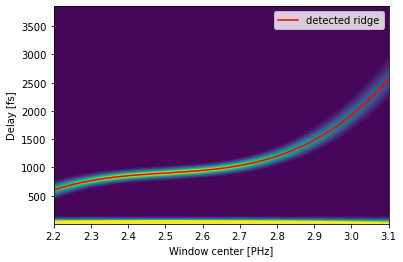

In [7]:
mywft.heatmap()

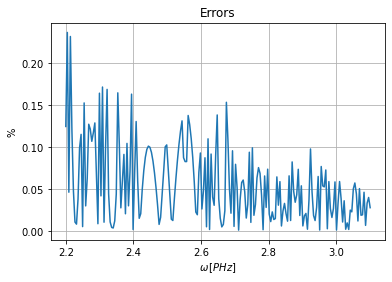

In [8]:
mywft.errorplot(percent=True)

Példa tetszőleges plotok készítésére:

[ legend.py:1247 -   _parse_legend_args() ] No handles with labels found to put in legend.


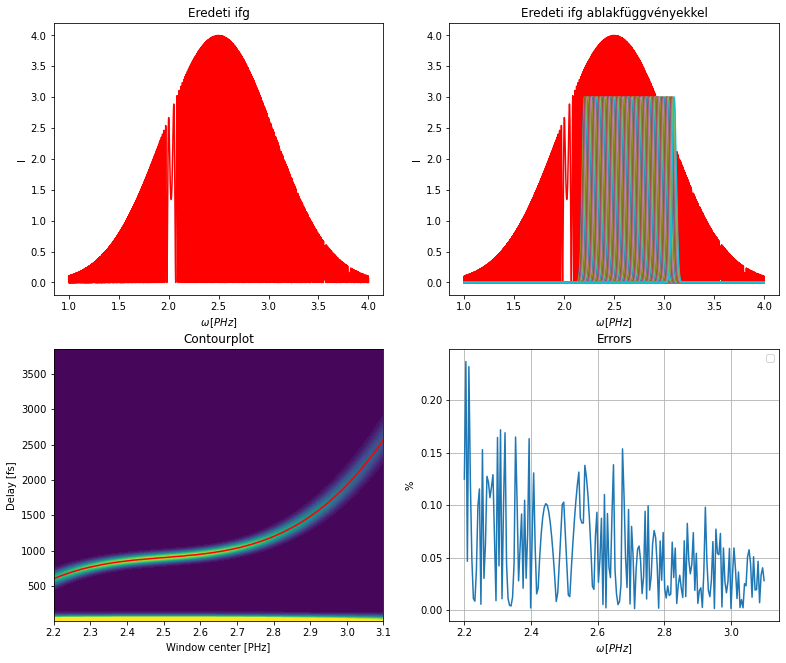

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13, 11))

mywft.plot(ax=ax1)
ax1.set(title="Eredeti ifg")

mywft.view_windows(ax=ax2, maxsize=200)
ax2.set(title="Eredeti ifg ablakfüggvényekkel")

mywft.heatmap(ax=ax3, include_ridge=True)
ax3.set(title="Contourplot");

mywft.errorplot(ax=ax4, percent=True)

Példa csak a `retrieve_GD` függvény használatára:

In [10]:
f = ps.Generator(1, 4, 2.5, delay=1900, GDD=-600, TOD=4000, pulse_width=3, resolution=0.05)
f.generate()

mywft2 = ps.WFTMethod(*f.data)

In [11]:
mywft2.add_window_arange(1.5, 3.5, 0.05, std=0.04)

In [12]:
GD_gorbe = mywft2.retrieve_GD()

Progress : [==============================] 100%

In [13]:
GD_gorbe.fit(reference_point=2.5, order=3);

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

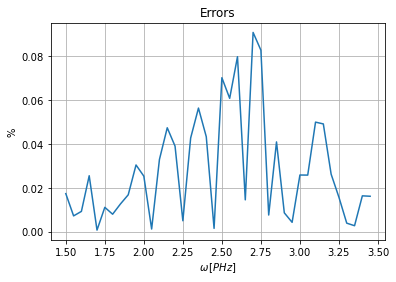

In [14]:
GD_gorbe.errorplot(percent=True)

A `fastmath` opciót itt nem adtam meg. Ez alapértelmezetten `True`, ilyenkor a `heatmap` nem hívható, mivel ekkor az ahhoz szükséges adatokat nem építi fel a program.

In [15]:
mywft2.heatmap()

ValueError: You need to recalculate with `fastmath=False` to plot the heatmap.

Néhány hiányosság: 

* A gerincvonalat a program automatikusan keresi meg, jelenleg még nincs lehetőség manuálisan állítani.


* Csak egyetlen egy gerincvonalat keres meg, így nem alkalmas pl. kettősen törő optikai szálak esetén, amikor mindkét polarizációs tengelye mentén terjedő módus egyidejűleg gerjesztve van.
